In [1]:
# package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display options
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x) # supresses scientific notation

In [2]:
path='listings.csv'
df = pd.read_csv(path)

In [3]:
#df = df.set_index('id')
df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_cleansed,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,12126.000,12126.000,0.000,0.000,0.000,12126.000,0.000,12124.000,12124.000,12126.000,...,8787.000,8784.000,8786.000,8777.000,8778.000,12126.000,12126.000,12126.000,12126.000,8945.000
mean,17873105.842,20190308173537.801,nan,nan,nan,57074830.361,nan,29.586,29.586,78722.187,...,9.641,9.870,9.880,9.738,9.626,5.763,4.799,0.670,0.294,1.533
std,10091699.603,3.199,nan,nan,nan,64523732.427,nan,172.496,172.496,20.542,...,0.813,0.557,0.525,0.628,0.758,14.405,13.598,2.214,3.309,1.847
min,1078.000,20190308173541.000,nan,nan,nan,23.000,nan,0.000,0.000,78701.000,...,2.000,2.000,2.000,2.000,2.000,1.000,0.000,0.000,0.000,0.010
25%,8826538.750,20190308173541.000,nan,nan,nan,6907346.750,nan,1.000,1.000,78704.000,...,10.000,10.000,10.000,10.000,9.000,1.000,1.000,0.000,0.000,0.220
50%,19364018.000,20190308173541.000,nan,nan,nan,28471194.500,nan,1.000,1.000,78721.000,...,10.000,10.000,10.000,10.000,10.000,1.000,1.000,0.000,0.000,0.820
75%,26629244.750,20190308173541.000,nan,nan,nan,95159372.500,nan,3.000,3.000,78744.000,...,10.000,10.000,10.000,10.000,10.000,3.000,2.000,1.000,0.000,2.200
max,32911946.000,20190308173541.000,nan,nan,nan,247514116.000,nan,1620.000,1620.000,78759.000,...,10.000,10.000,10.000,10.000,10.000,81.000,81.000,26.000,43.000,15.470


In [4]:
df.drop(columns=['scrape_id', 'thumbnail_url', 'medium_url', 'host_id', 'xl_picture_url', 'host_acceptance_rate', 'neighbourhood_group_cleansed'], inplace=True)

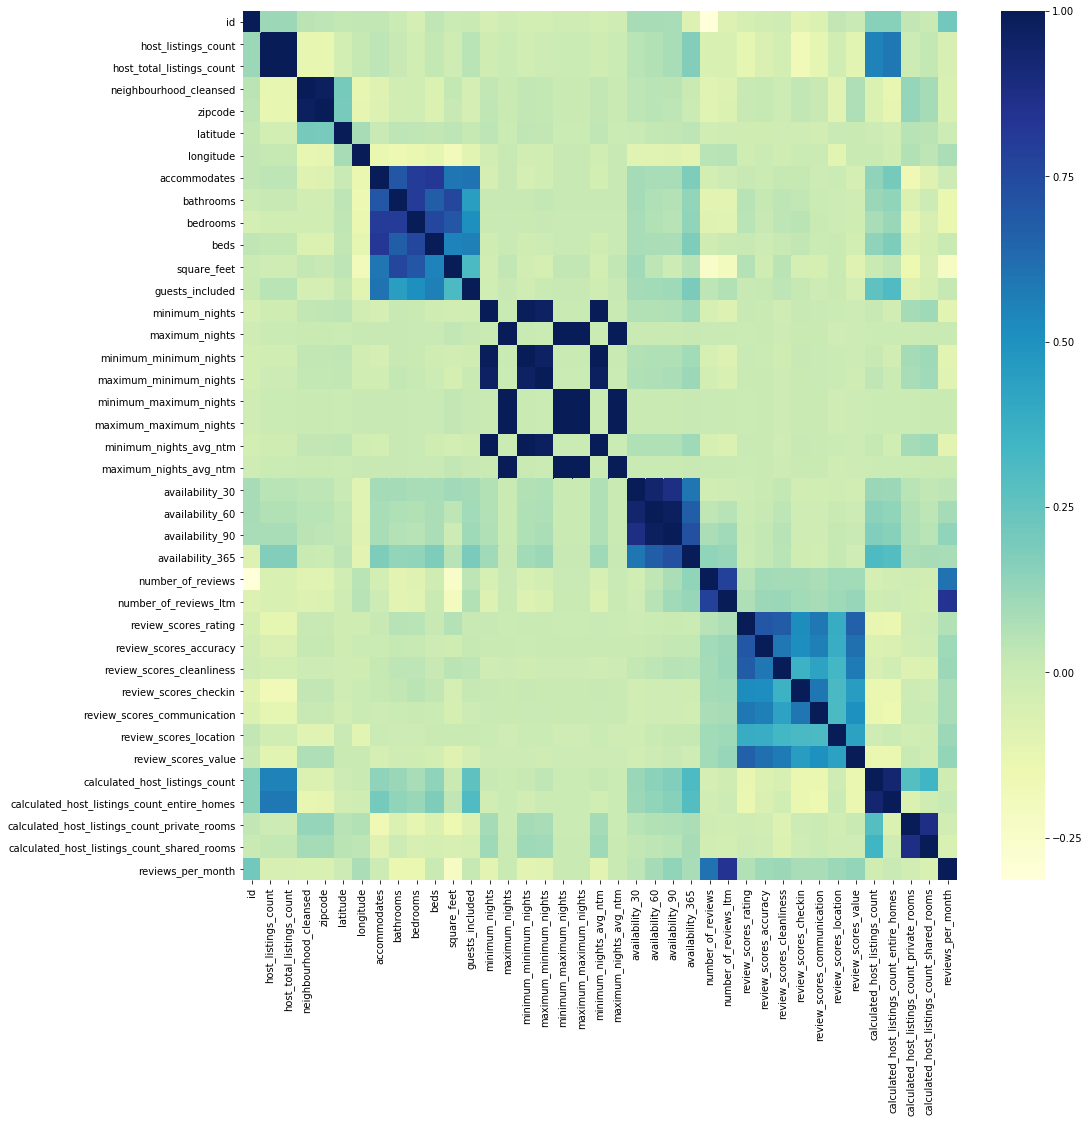

In [5]:
corr = df.corr()
plt.subplots(figsize=(16, 16))

sns.heatmap(corr,cmap="YlGnBu",annot=False)
plt.show()

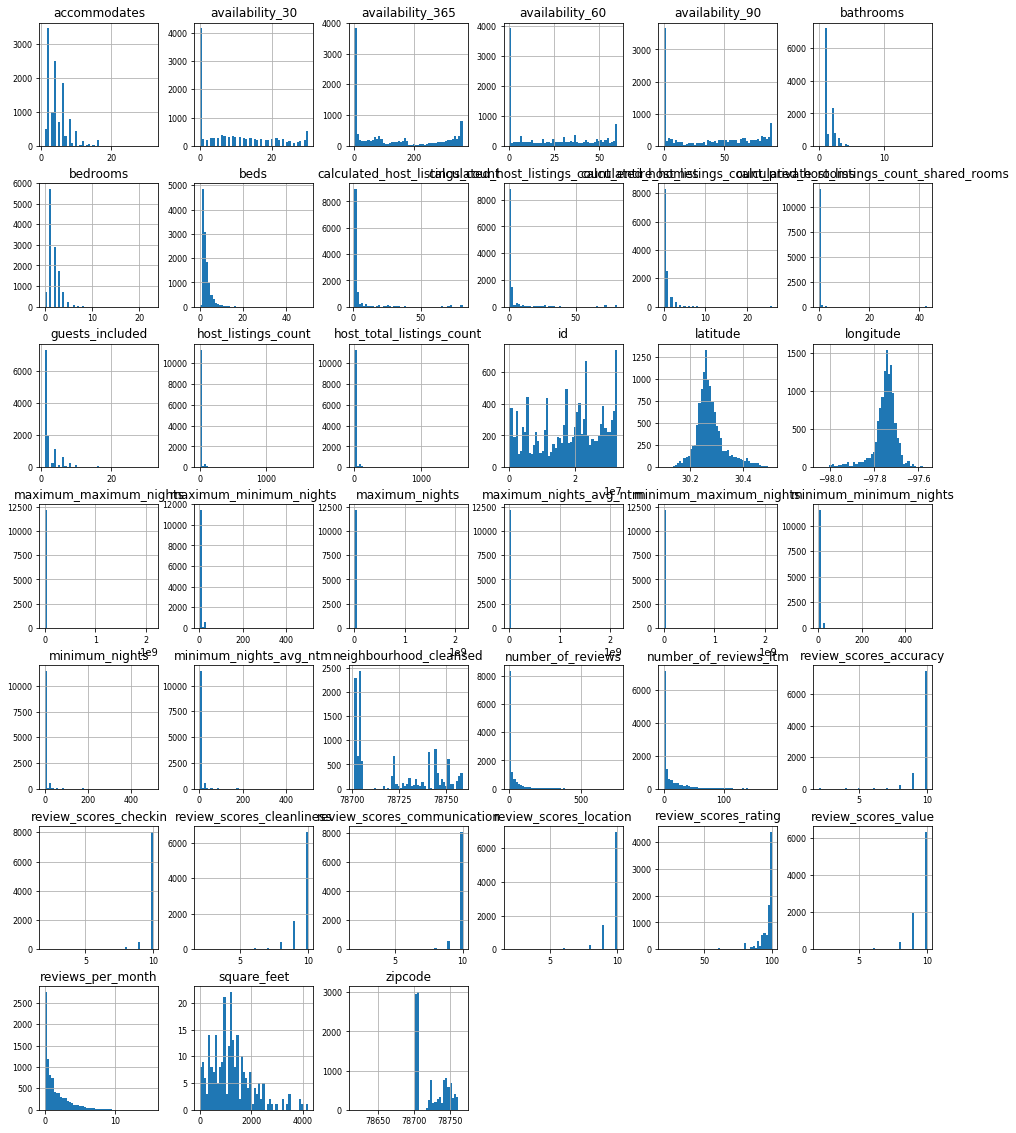

In [6]:
# basic EDA, continued

df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [7]:
df.columns.values

array(['id', 'listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'clean

In [8]:
df['room_type'].unique() #['Entire home/apt', 'Private room', 'Shared room']

# Removing individual rooms (non entire properties)
df = df[df['room_type'] == 'Entire home/apt']

In [9]:
df['transit'].sample(5)

10776    In the heart of Broncos and West Campus, plent...
9640     Can get to the house thru multiple hwys of 183...
3809                                                   NaN
5304                                                   NaN
10861    Uber and Lyft are solid options. It is roughly...
Name: transit, dtype: object

In [10]:
df['access'].sample(5)

11916                                                  NaN
12118                                                  Yes
1871     Guest Access:  House / Front Porch / Front Yar...
2440                                Entire home available.
8466                                                   NaN
Name: access, dtype: object

In [11]:
df['neighbourhood_cleansed'].sample(5)

6856     78741
4171     78737
10135    78702
5756     78702
11883    78704
Name: neighbourhood_cleansed, dtype: int64

In [12]:
#df['market'].sample(5) 
#market and smart location and likely others say Austin and are redundant

Commercial listings characteristics

    9% of Entire Home/apartment listings belong to hosts with more than one;
    32% of Private Rooms are by hosts who are renting two or more rooms;
    and 40% of shared room listings are by hosts who have 2 or more shared spaces.

Source is about NYC
http://insideairbnb.com/nyc-report-on-the-anti-airbnb-advertising-law/

Inside Airbnb's "San Francisco Model" uses a modified methodology as follows:

* A Review Rate of 50% is used to convert reviews to estimated bookings.

* Alex Marqusee uses a review rate of 72%, however this is attributed to an unreliable source: Airbnb's CEO and co-founder Brian Chesky.

* The Budget and Legislative Analyst's Office (page 49) also use a value 72% for their review rate, and in addition, introduce a higher impact model using a review rate of 30.5% - based on comparing public data of reviews to the The New York Attorney General’s report on Airbnb released in October 2014.

* Inside Airbnb analysis found that using a review rate 30.5% is more fact based, however probably not conservative enough, given that the Budget and Legislative Analyst's Office did not take into account missing reviews because of deleted listings. A review rate of 72% is unverifiable - therefore 50% was chosen as it sits almost exactly between 72% and 30.5%.

* An average length of stay is configured for each city, and this, multiplied by the estimated bookings for each listing over a period gives the occupancy rate

* Where statements have been made about the average length of stay of Airbnb guests for a city, this was used.

  * For example, Airbnb reported 5.5 nights as the average length of stay for guests using Airbnb in San  Francisco.

* Where no public statements were made about average stays, a value of 3 nights per booking was used.

* If a listing has a higher minimum nights value than the average length of stay, the minimum nights value was used instead.

* The occupancy rate was capped at 70% - a relatively high, but reasonable number for a highly occupied "hotel".

  * This controls for situations where an Airbnb host might change their minimum nights during the high season, without the review data having a chance to catch up; or for a listing with a very high review rate.

  * It also ensures that the occupancy model remains conservative.

* Number of nights booked or available per year for the high availability and frequently rented metrics and filters were generally aligned with a city's short term rental laws designed to protect residential housing.
    
Source: http://insideairbnb.com/about.html

Inside Airbnb: Austin uses the following parameters:

* A high availability metric and filter of 60 days per year to estimate the point at which a residential property is unavailable for long-term rental or use as a primary residence
* A frequently rented filter of 60 days per year as per the high availability metric
* A review rate of 50% for the number of guests making a booking who leave a review
* An average booking of 3 nights unless a higher minimum nights is configured for a listing
* A maximum occupancy rate of 70% to ensure the occupancy model does not produce artifically high results based on the available data

In [13]:
len(df.loc[df['minimum_nights'] > 3])

1004

In [14]:
reviews_df = df[['reviews_per_month', 'zipcode']].groupby(['zipcode'])
#print(reviews_df.describe())

In [15]:
reviews_df = reviews_df.count().reset_index()
print(len(reviews_df.loc[reviews_df['reviews_per_month'] > 0]))
print(len(reviews_df))

46
50


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7672fcf748>]],
      dtype=object)

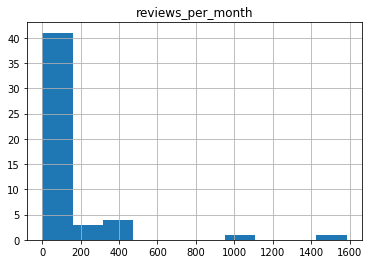

In [16]:
reviews_df = reviews_df.set_index('zipcode')
reviews_df.hist()
#x-axis doesn't mean much [zipcodes got re-indexed]

In [17]:
#follow previously mentioned methodology of multiplying bookings by the maximum of 3 or the set minimum nights
def average_monthly_nights_occupied(row):
    if row['minimum_nights'] > 3.0:
        return row['bookings_per_month'] * row['minimum_nights']
    else:
        return row['bookings_per_month'] * 3

In [18]:
df['bookings_per_month'] = df['reviews_per_month']*0.65
df['nights_per_month'] = df.apply(average_monthly_nights_occupied, axis=1)

In [19]:
df[['bookings_per_month', 'nights_per_month']].describe()

,bookings_per_month,nights_per_month
count,6595.000,6595.000
mean,1.041,3.723
std,1.222,5.968
min,0.007,0.020
25%,0.156,0.546
50%,0.579,1.950
75%,1.534,5.089
max,10.056,160.290


In [20]:
df[['bookings_per_month', 'nights_per_month']].median()

bookings_per_month   0.579
nights_per_month     1.950
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76746ed160>,
      dtype=object)

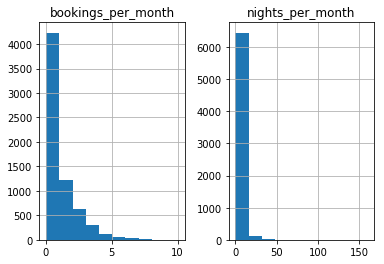

In [21]:
df[['bookings_per_month', 'nights_per_month']].hist()

In [22]:
# seems pretty conservative, indeed... 
# I have heard research suggesting # of reviews is dropping off over time, 
# so maybe best to convert with a bigger factor than 0.5?

# I ended up bumping it to .65 (arbitrarily)

# Thought #2 on this is that VRBO was created in Austin, 
# so this too would increase (maybe double or more) the bookings

# Thought #3, the maximum nights per month seems okay, even with the maximum not making sense at first glance
# I think this is probably because some very long bookings were made and the whole length of stay is considered
# to be in that month

In [23]:
df['price'] = df['price'].str.replace('$', '').str.replace(',','')

In [24]:
df['monthly_revenue'] = df['nights_per_month'] * df['price'].astype('float')

In [25]:
df['monthly_revenue'].describe()

count     6595.000
mean       918.972
std       5785.661
min          0.000
25%        124.215
50%        353.632
75%        818.756
max     260000.000
Name: monthly_revenue, dtype: float64

Yowza, quite the right tail... In fact there are 5 zipcodes with a max value of $90k or more! (see below)
...They are 78703, 78704, 78701, 78741, 78746

In [53]:
monthly_revenue_by_zip = df[['monthly_revenue', 'zipcode']].groupby(['zipcode']).median()

In [54]:
monthly_revenue_by_zip.describe()[:10]

,monthly_revenue
count,46.000
mean,363.723
std,164.552
min,87.516
25%,270.953
50%,332.803
75%,429.909
max,1084.200


Another outcome variable, occupancy rate, could be made, but this seem secondary

### NLP 'transit' feature

Do some baseline (tf-idf? textrank? word2vec if context is needed) stuff here...

In [28]:
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

In [29]:
# Simple tokenizer for ignoring punctuation/stopwords, removing digits and lowercasing
# Source: https://nlpforhackers.io/tf-idf/
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
 
stop_words = stopwords.words('english') + list(punctuation)
 
def tokenize(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return [w for w in words if w not in stop_words and not w.isdigit()]

In [30]:
transit_df = df[df['transit'].notnull()]

In [31]:
len(transit_df)

5506

In [32]:
transit_df['transit'][0]

'We are 1 block from the 1 or 5 bus routes that go right downtown & run every 10 minutes.  We are also on the UT free transit bus. Getting here from the airport: Uber is $15-17 and is my prefered way to get from the airport. Taxis run between $30-35 and is fast. Supershuttle is a minibus that is shared with 2-3 other peopIe, costs about $15 and is medium slow. The city bus #101 is only $1 and very slow. I highly recommend Car2Go - a shared vehicle service as an alternative to renting a car.  You can even get them to and from the airport (costs about $10).  but you have to sign up in advance.'

In [33]:
# build the vocabulary in one pass
vocabulary = set()

for row in transit_df['transit']:
    words = tokenize(str(row))
    vocabulary.update(words)
 
vocabulary = list(vocabulary)
word_index = {w: idx for idx, w in enumerate(vocabulary)}
 
VOCABULARY_SIZE = len(vocabulary)
DOCUMENTS_COUNT = len(transit_df['transit'])
 
print(VOCABULARY_SIZE, DOCUMENTS_COUNT)

6367 5506


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(vocabulary=vocabulary, ngram_range=(1,3))
x = v.fit_transform(transit_df['transit'])

In the following cell:

We’re interested in all documents. 
We calculate the mean of each column across the selected rows, which results in a single row of tf-idf values. And this row we then simply pass on to our previous function for picking out the top n words. 
One crucial trick here, however, is to first filter out the words with relatively low scores (smaller than the provided threshold). This is because common words, such as ‘a’ or ‘the’, while having low tf-idf scores within each document, are so frequent that when averaged over all documents they would otherwise easily dominate all other terms.

Source: https://buhrmann.github.io/tfidf-analysis.html

In [35]:
g = x.toarray()

In [36]:
g[g < 0.1] = 0
tfidf_means = np.mean(g, axis=0)
tfidf_ = list(zip(tfidf_means, v.get_feature_names()))

In [37]:
sorted(tfidf_, key = lambda x: -x[0])[:25]

[(0.03744428547411773, 'bus'),
 (0.03479950469647853, 'uber'),
 (0.03448772907153071, 'parking'),
 (0.03363665775115507, 'downtown'),
 (0.03290886870659196, 'austin'),
 (0.03222672391279933, 'ride'),
 (0.031157827676175566, 'car'),
 (0.029450915070509204, 'lyft'),
 (0.028790456668598835, 'walk'),
 (0.028321239907812622, 'street'),
 (0.026802443600759663, 'bike'),
 (0.0264789974273684, 'stop'),
 (0.025451139037633002, 'away'),
 (0.025344047365154512, 'minutes'),
 (0.024994188393169206, 'available'),
 (0.024276989099452386, 'around'),
 (0.02341735678455797, 'walking'),
 (0.02198826840622332, 'get'),
 (0.021170109472601444, 'also'),
 (0.02101040555502897, 'public'),
 (0.02054591774141942, 'easy'),
 (0.01973580415077096, 'minute'),
 (0.019609196635859034, 'house'),
 (0.019473218741390557, 'metro'),
 (0.019457673478464853, 'transportation')]

Let's look at the grouped by zipcode tf-idfs, which we can later use as features for the zips and then join with another dataset on zip. We can also use these as a sanity check; it should look pretty similar to when we did the same thing on individual listings (above).

In [38]:
transit_df = transit_df.groupby(df['zipcode'])['transit'].apply(lambda x: ' '.join(x))

In [39]:
transit_df.head()

zipcode
78619.000    You will need a rental car if you come from ou...
78620.000    No public transportation but Deer Run Chauffeu...
78652.000    You can use Uber, Lyft, taxi, or rent your own...
78681.000    Only 4 miles from the Capital Metro Light Rail...
78701.000    Cabs, Buses, Bikes and Walking. This place has...
Name: transit, dtype: object

In [40]:
y = v.fit_transform(transit_df)
w = y.toarray()

In [41]:
# after some trial and error, 0.05 on a per-zipcode basis seems like a reasonable tf-idf cutoff
w[w < 0.05] = 0
tfidf_means = np.mean(w, axis=0)
tfidf_ = sorted(zip(tfidf_means, v.get_feature_names()), key=lambda x: -x[0])[:25]

In [42]:
# number of non-zero tokens
for row in w[:10]:
    print(np.count_nonzero(row))

12
36
6
13
77
62
64
61
89
82


In [43]:
''' Top tfidf features in specific document (matrix row) '''
features = v.get_feature_names()

features_tfidf_df = []

for row in w:
    ''' Get top n (25) tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:25]
    
    ''' Here we want to check if any of the top 25 values for a zipcode are in the top 25 overall, 
    and if so, we want to give that zip the feature's tf-idf times the number of times they appear in the zip code row'''
    feature_tfidf = []
    for i in topn_ids:
        if features[i] in [y for x, y in tfidf_]:
            feature_tfidf += [item[0] for item in tfidf_ if item[1] == features[i]]
        else:
            continue
    feature_tfidfs = sum(feature_tfidf)
    features_tfidf_df.append(feature_tfidfs)

transit_df = pd.DataFrame(transit_df)
transit_df['tfidfs'] = features_tfidf_df

In [44]:
transit_df

,transit,tfidfs
zipcode,,
78619.000,You will need a rental car if you come from ou...,0.439
78620.000,No public transportation but Deer Run Chauffeu...,0.118
78652.000,"You can use Uber, Lyft, taxi, or rent your own...",0.439
78681.000,Only 4 miles from the Capital Metro Light Rail...,0.687
78701.000,"Cabs, Buses, Bikes and Walking. This place has...",1.017
78702.000,5 min walk to Capitol Metro Rail (train that t...,1.937
78703.000,There are numerous options for getting around ...,1.725
78704.000,"Parking for our place is on the street, roughl...",1.894
78705.000,We are 1 block from the 1 or 5 bus routes that...,1.285


# Final Joins

We want to add our tf-idfs sums variable as a potential feature, and we might as well also bring back the AirBnB monthly revenue feature/outcome variable too

In [46]:
AirBnB_zipcode_data = pd.concat([transit_df['tfidfs'], monthly_revenue_by_zip], axis=1, ignore_index=False )
AirBnB_zipcode_data.describe()

,tfidfs,monthly_revenue
count,47.000,46.000
mean,1.233,363.723
std,0.512,164.552
min,0.053,87.516
25%,0.955,270.953
50%,1.339,332.803
75%,1.638,429.909
max,1.937,1084.200


In [47]:
AirBnB_zipcode_data.to_csv('AirBnB_zipcode_data.csv')

In [48]:
merged2 = pd.read_csv('merged2.csv', header=None)

In [49]:
merged2 = merged2.set_index(6)
merged2

,0,1,2,3,4,5,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
6,,,,,,,,,,,,,,,,,,,,,
78731.000,0,5,3507 GREYSTONE DR,NaN,AUSTIN,TRAVIS,30.358,-97.749,696.000,1481.000,...,0.000,160000.000,2018-06-15,155000.000,2018-07-23,2018-06,2018-07,1.000,-0.031,0.470
78731.000,1,43,6425 WESTSIDE DR,NaN,AUSTIN,TRAVIS,30.345,-97.754,1440.000,3271.000,...,2.000,309999.000,2018-05-05,230000.000,2018-10-05,2018-05,2018-10,5.000,-0.258,0.440
78759.000,2,58,8405 ARDASH LN,NaN,AUSTIN,TRAVIS,30.378,-97.758,2031.000,3903.000,...,2.000,280000.000,2018-01-25,250000.000,2018-05-18,2018-01,2018-05,4.000,-0.107,0.520
78731.000,3,71,6632 E HILL DR,NaN,AUSTIN,TRAVIS,30.348,-97.753,1760.000,1651.000,...,1.000,325000.000,2018-06-20,278000.000,2018-09-20,2018-06,2018-09,3.000,-0.145,1.066
78759.000,4,74,8820 HONEYSUCKLE TRL,NaN,AUSTIN,TRAVIS,30.380,-97.743,1664.000,3890.000,...,0.000,295000.000,2018-08-16,280000.000,2018-08-21,2018-08,2018-08,0.000,-0.051,0.428
78731.000,5,85,6700 CAT CREEK TRL,2,AUSTIN,TRAVIS,30.363,-97.779,1270.000,11230.000,...,1.000,299900.000,2018-07-27,299900.000,2018-09-06,2018-07,2018-09,2.000,0.000,0.113
78759.000,6,87,3612 KENTFIELD RD,NaN,AUSTIN,TRAVIS,30.373,-97.744,1431.000,3903.000,...,2.000,289900.000,2018-07-11,305000.000,2018-10-02,2018-07,2018-10,3.000,0.052,0.367
78759.000,7,89,8832 HONEYSUCKLE TRL,NaN,AUSTIN,TRAVIS,30.380,-97.743,1466.000,3507.000,...,0.000,299900.000,2018-02-28,306000.000,2018-04-03,2018-02,2018-04,2.000,0.020,0.418
78731.000,8,91,4019 TEALWOOD,NaN,AUSTIN,TRAVIS,30.369,-97.759,1475.000,3929.000,...,2.000,315000.000,2018-03-23,308500.000,2018-06-15,2018-03,2018-06,3.000,-0.021,0.375


In [50]:
merged3 = AirBnB_zipcode_data.join(merged2)

In [51]:
#merged3.dropna(inplace=True)
merged3.to_csv('merged3.csv')
merged3.head(10)

,tfidfs,monthly_revenue,0,1,2,3,4,5,7,8,...,19,20,21,22,23,24,25,26,27,28
78619.000,0.439,nan,nan,nan,NaN,NaN,NaN,NaN,nan,nan,...,nan,nan,NaN,nan,NaN,NaN,NaN,nan,nan,nan
78620.000,0.118,590.850,nan,nan,NaN,NaN,NaN,NaN,nan,nan,...,nan,nan,NaN,nan,NaN,NaN,NaN,nan,nan,nan
78645.000,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,nan,...,nan,nan,NaN,nan,NaN,NaN,NaN,nan,nan,nan
78652.000,0.439,742.073,nan,nan,NaN,NaN,NaN,NaN,nan,nan,...,nan,nan,NaN,nan,NaN,NaN,NaN,nan,nan,nan
78660.000,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan,nan,...,nan,nan,NaN,nan,NaN,NaN,NaN,nan,nan,nan
78681.000,0.687,231.855,nan,nan,NaN,NaN,NaN,NaN,nan,nan,...,nan,nan,NaN,nan,NaN,NaN,NaN,nan,nan,nan
78701.000,1.017,525.915,4248.000,11534.000,1807 SAN GABRIEL ST,A,AUSTIN,TRAVIS,30.283,-97.748,...,2.000,599950.000,2017-12-01,580000.000,2018-09-12,2017-12,2018-09,9.000,-0.033,0.616
78701.000,1.017,525.915,4249.000,11578.000,1700 WEST AVE,NaN,AUSTIN,TRAVIS,30.281,-97.747,...,2.000,999000.000,2017-02-01,920000.000,2018-05-25,2017-02,2018-05,15.000,-0.079,0.340
78701.000,1.017,525.915,4250.000,11590.000,907 W 18TH ST,NaN,AUSTIN,TRAVIS,30.282,-97.748,...,1.000,1395000.000,2018-02-08,1360000.000,2018-04-30,2018-02,2018-04,2.000,-0.025,0.460
78701.000,1.017,525.915,4251.000,11593.000,410 E 5TH ST,501A,AUSTIN,TRAVIS,30.266,-97.739,...,1.000,1600000.000,2018-03-05,1500000.000,2018-08-01,2018-03,2018-08,5.000,-0.062,1.332


In [ ]:
# for individual property analysis (e.g. xgboost notebook), we want to get the zipcodes as a separate column again...
#merged3['zipcode'] = merged3.index()
#merged3.reset_index()